Initialize necessary packages

In [1]:
import numpy as np
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import ast


DT Target analysis

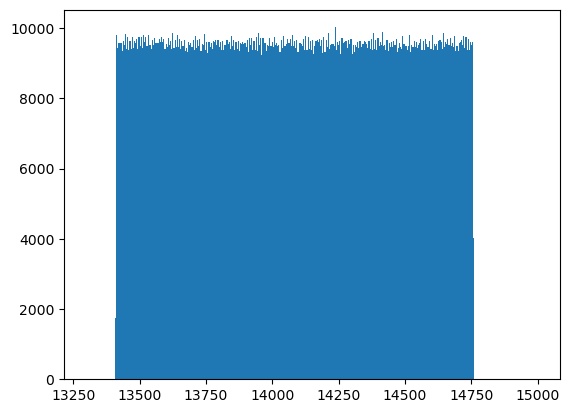

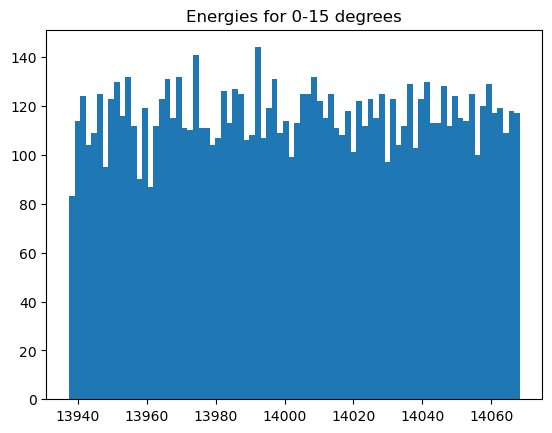

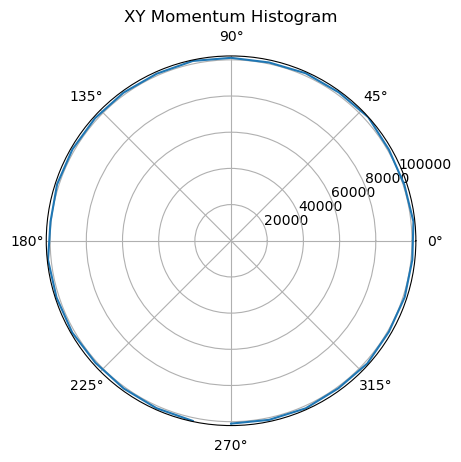

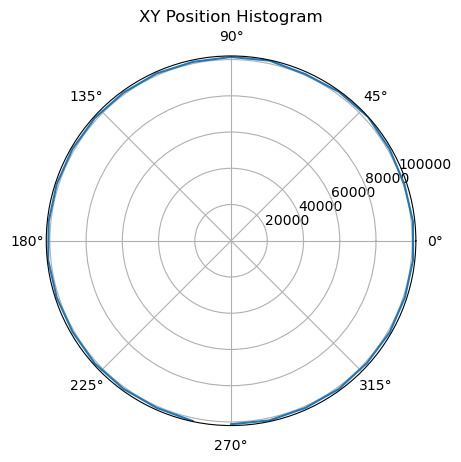

Average Energy || Number of events
14084.19       || 3034921


In [12]:

df_DT_Test = pd.read_csv("Loong1213_DT.csv", delimiter=";", names = ["Energy","Momentum","Position","ParticleID"])
energy_data = df_DT_Test ['Energy'] # grabs energy and tof data from compy csv output
momentum_data = df_DT_Test ['Momentum']
momentum_data = momentum_data.apply(ast.literal_eval)
momentum_x = momentum_data.apply(lambda x: x[0])
momentum_y = momentum_data.apply(lambda x: x[1])
momentum_z = momentum_data.apply(lambda x: x[2])
momentum_theta = np.arctan(momentum_y/momentum_x)
#print(momentum_theta[30])
for i in range(len(momentum_x)):
    if momentum_x[i]<0:
        momentum_theta[i] = momentum_theta[i] + np.pi
position_data = df_DT_Test ['Position']
position_data = position_data.apply(ast.literal_eval)
position_x = position_data.apply(lambda x: x[0])
position_y = position_data.apply(lambda x: x[1])
position_z = position_data.apply(lambda x: x[2])
position_theta = np.arctan(position_y/position_x)
for i in range(len(position_x)):
    if position_x[i]<0:
        position_theta[i] = position_theta[i] + np.pi
bin_number = 30
p_hist, p_edges = np.histogram(momentum_theta,bins=bin_number)
p_bins = p_edges[0:bin_number]
pos_hist, pos_edges = np.histogram(position_theta,bins=bin_number)
pos_bins = pos_edges[0:bin_number]

#introduce energy chunking by theta

plt.figure()
plt.hist(energy_data,bins=400,range=(13300,15000))
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(p_bins,p_hist)
ax.set_title("XY Momentum Histogram")
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(pos_bins,pos_hist)
ax.set_title("XY Position Histogram")
plt.show()
print("Average Energy || Number of events")
print(round(np.mean(energy_data),2),"      ||", len(energy_data))
#print(momentum_x)
#hist, edges = np.histogram(energy_data, bins = bin_number)
#bins = edges[0:bin_number]




In [16]:
energy_theta = []
for i in range(len(position_theta)):
    if position_theta[i] > 0 and position_theta[i] <np.pi/16:
        if 0<np.arctan(position_z[i]/position_x[i])<np.pi/16 and position_x[i] >0:
            energy_theta.append(energy_data[i])

Text(0.5, 1.0, 'Energies for 0-15 degrees')

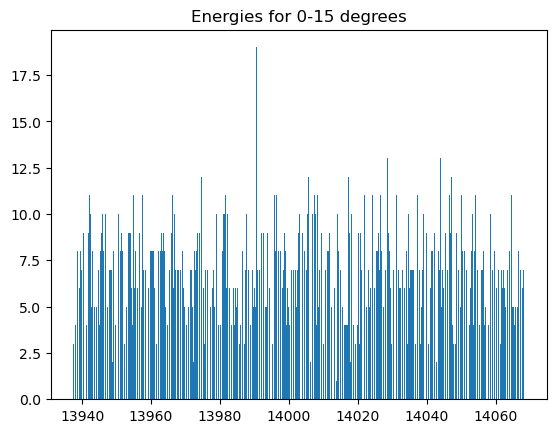

In [22]:
plt.figure()
plt.hist(energy_theta, bins = 1000)
plt.title("Energies for 0-15 degrees")

Analysis of C13-d collision

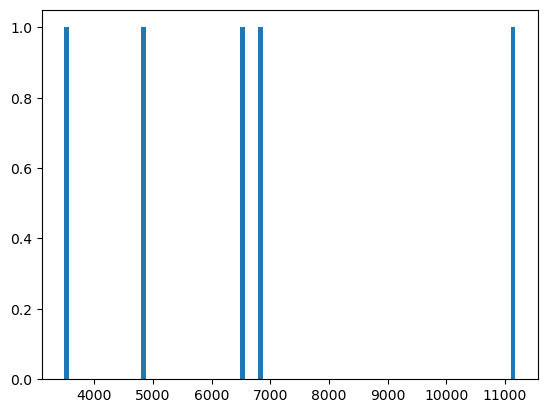

In [68]:
df_C13_Test = pd.read_csv("DC13_1e6_12_1.csv",delimiter=";", names=["Energy","Momentum","Position","ParticleID"])
c13_energy_data = df_C13_Test [df_C13_Test["ParticleID"] == "alpha"]["Energy"]
plt.figure()
plt.hist(c13_energy_data,bins=100)
plt.show()

Analyze Secondaries/Incident energy of deuteron

80 4108


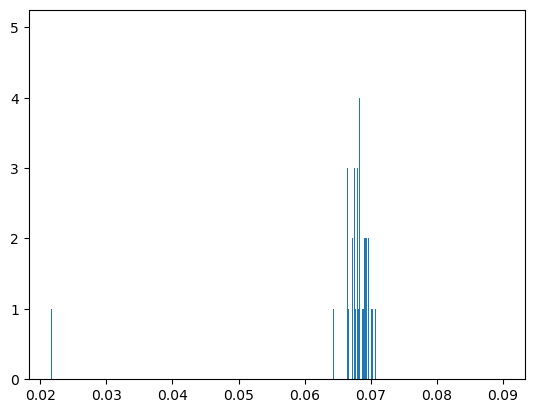

In [11]:
df_Secondaries = pd.read_csv("Secondaries.csv", names=["NumSecondaires"])
num_sec_data = df_Secondaries ["NumSecondaires"] [df_Secondaries ["NumSecondaires"] != 0.1]
print(len(num_sec_data),len(df_Secondaries)-len(num_sec_data))
plt.figure()
plt.hist(num_sec_data,bins=1000)
plt.show()